In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
!! ls *.csv

['charging_behaviour_study_profiles.csv',
 'charging_behaviour_study_trends.csv',
 'impact_of_electric_vehicles_profiles.csv',
 'low_voltage_network_solutions_connection_energies.csv',
 'low_voltage_network_solutions_connection_times.csv',
 'low_voltage_network_solutions_profiles.csv',
 'my_electric_avenue_profiles.csv',
 'profiles_for_production_use.csv']

In [3]:
profile_paths = ['charging_behaviour_study_profiles.csv',
                'impact_of_electric_vehicles_profiles.csv',
                'low_voltage_network_solutions_profiles.csv',
                'my_electric_avenue_profiles.csv']

In [4]:
os.path.splitext('charging_behaviour_study_profiles.csv')[0]

'charging_behaviour_study_profiles'

In [5]:
profile_names = [ os.path.splitext(name)[0] for name in profile_paths ]
profile_names

['charging_behaviour_study_profiles',
 'impact_of_electric_vehicles_profiles',
 'low_voltage_network_solutions_profiles',
 'my_electric_avenue_profiles']

In [6]:
profiles = [pd.read_csv(profile) for profile in profile_paths]

In [7]:
named_data = {k:v for k,v in zip(profile_names, profiles)}

In [8]:
[print('\n', name, '\n', len(profile) ) for name, profile in named_data.items()]


 charging_behaviour_study_profiles 
 8736

 impact_of_electric_vehicles_profiles 
 8736

 low_voltage_network_solutions_profiles 
 8736

 my_electric_avenue_profiles 
 8736


[None, None, None, None]

In [9]:
[print('\n', name, '\n', profile.head(2) ) for name, profile in named_data.items()]


 charging_behaviour_study_profiles 
    Unnamed: 0  domestic      work    public
0           0  0.110411  0.004016  0.002754
1           1  0.075705  0.003294  0.002305

 impact_of_electric_vehicles_profiles 
    Unnamed: 0  domestic  commercial  delivery    public
0           0  0.165638    0.009463  0.852861  0.006936
1           1  0.111480    0.009931  0.554756  0.009312

 low_voltage_network_solutions_profiles 
    Unnamed: 0  domestic
0           0    1.0175
1           1    0.7375

 my_electric_avenue_profiles 
    Unnamed: 0  domestic
0           0    0.6215
1           1    0.4500


[None, None, None, None]

In [10]:
use = [ named_data['charging_behaviour_study_profiles']['domestic'],
        named_data['charging_behaviour_study_profiles']['work'],
        named_data['charging_behaviour_study_profiles']['public'],
        named_data['impact_of_electric_vehicles_profiles']['commercial'],
        named_data['impact_of_electric_vehicles_profiles']['delivery'],
      ]

In [11]:
columns = ['domestic', 'work', 'public', 'commercial', 'delivery']

In [12]:
df = pd.DataFrame(use).T
df

,domestic,work,public,commercial,delivery
0,0.110411,0.004016,0.002754,0.009463,0.852861
1,0.075705,0.003294,0.002305,0.009931,0.554756
2,0.048047,0.002703,0.001810,0.009038,0.110974
3,0.031226,0.002554,0.001397,0.008229,0.024958
4,0.022187,0.002667,0.001388,0.017055,0.022952
...,...,...,...,...,...
8731,0.261523,0.007781,0.007900,0.024927,0.156896
8732,0.246792,0.007091,0.006421,0.024693,0.120732
8733,0.221529,0.006618,0.004875,0.019271,0.113758
8734,0.190256,0.006332,0.004018,0.012081,0.105539


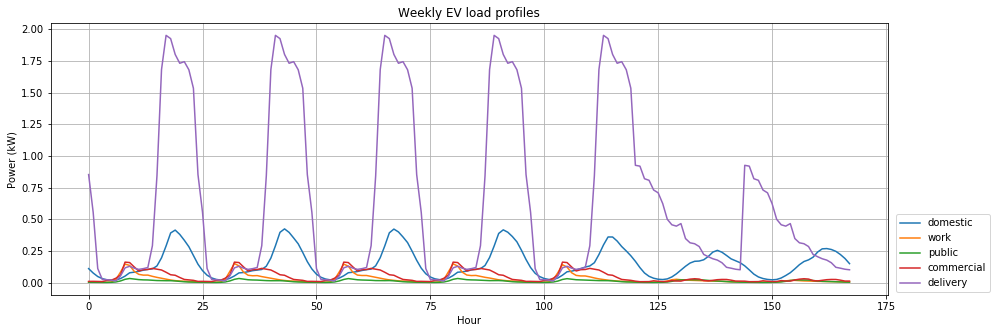

In [13]:
ax = ( df[:7*24].plot(title='Weekly EV load profiles',
                   grid=True,
                   figsize=(15,5)))
ax.legend(loc=(1.01, 0.01))
discard = ax.set_xlabel('Hour')
discard = ax.set_ylabel('Power (kW)')

In [14]:
df.to_csv('../cleaned/profiles_for_production_use.csv', index=False)